# **–¢–µ–º–∞ –ø—Ä–æ–µ–∫—Ç–∞**
 –û–±—É—á–µ–Ω–∏–µ –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏ –¥–ª—è –º—É–ª—å—Ç–∏–∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —ç–º–æ—Ü–∏–π, –∫–æ—Ç–æ—Ä—ã–µ –≤—ã—Ä–∞–∂–µ–Ω—ã –≤ –ø–æ—Å—Ç–µ —Å–æ—Ü–∏–∞–ª—å–Ω–æ–π —Å–µ—Ç–∏ –¢–≤–∏—Ç—Ç–µ—Ä.

**–ò—Å–ø–æ–ª–Ω–∏—Ç–µ–ª–∏**: –°–∞–º–æ–π–ª–µ–Ω–∫–æ –ï–≤–∞, –°–º–∏—Ä–Ω–æ–≤–∞ –ì–ª–∞—Ñ–∏—Ä–∞

**–î–∞—Ç–∞—Å–µ—Ç**: Twitter Emotion Classification Dataset
https://www.kaggle.com/datasets/aadyasingh55/twitter-emotion-classification-dataset/data

The "Emotion" dataset consists of 416,809 English-language Twitter messages categorized into six basic emotions: anger, fear, joy, love, sadness, and surprise.


**–ó–∞–¥–∞—á–∞**: –£–ª—É—á—à–∏—Ç—å —Å–∫–æ—Ä—É –∫–∞–∫ –≤ —Ä–∞–º–∫–∞—Ö –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏—Ö, —Ç–∞–∫ –∏ –≤ —Ä–∞–º–∫–∞—Ö –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–≤—ã—Ö –ø–æ–¥—Ö–æ–¥–æ–≤ –∏ –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –Ω–∞–∏–±–æ–ª–µ–µ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ

In [ ]:
!pip install nltk
!pip install gensim

–ü—Ä–æ–≤–µ–¥—ë–º –≤—Å–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –∏–º–ø–æ—Ä—Ç—ã –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≤—ã–±—Ä–∞–Ω–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç.

In [ ]:
import pandas as pd
import spacy
import nltk
import string
import numpy as np
import gensim
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
from google.colab import drive
from gensim.models import Word2Vec
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/twitter/twitter_emotions_dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = df.set_index('Unnamed: 0')
df.index.name = None
df.sample(10)

text  label
163536              i feel crappy and start to cry myself      0
50218   i think i am not rlly prepared for it thats wh...      4
77576   i do at least feel reasonably virtuous about m...      1
85125   i got up and went for a run despite feeling gr...      0
126562  i feel so isolated and no matter how much i tr...      0
273597            i am feeling really rotten this morning      0
90388   i know this is abnormal for someone who isn t ...      0
352313   i feel that heineken is just popular import beer      1
398911  i just feel kinda helpless and frustrated a hr...      0
147543  i feel unwelcome at home quite the opposite ac...      0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ MB


In [ ]:
df['label'].value_counts()

label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64

–î–∞—Ç–∞—Å–µ—Ç —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ **416.809** —Å—Ç—Ä–æ–∫. –ü–æ –∏—Å—á–∏—Å–ª–µ–Ω–∏—é –∑–Ω–∞—á–µ–Ω–∏–π —ç–º–æ—Ü–∏–π –≤–∏–¥–Ω–æ, —á—Ç–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –¢–≤–∏—Ç—Ç–µ—Ä–∞ —Å–ª–∏—à–∫–æ–º –∂–∏–∑–Ω–µ—Ä–∞–¥–æ—Å—Ç–Ω—ã–µ –ª—é–¥–∏ (—á—Ç–æ —Å—Ç—Ä–∞–Ω–Ω–æ), –Ω–∞—Å—Ç–æ–ª—å–∫–æ, —á—Ç–æ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–π –ø–µ—Ä–µ–≤–µ—Å –≤ 10! —Ä–∞–∑ –º–µ–∂–¥—É –∫—Ä–∞–π–Ω–∏–º–∏ –∫–ª–∞—Å—Å–∞–º–∏ —ç–º–æ—Ü–∏–∏. –î–∞–ª–µ–µ –º—ã –ø–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º —ç—Ç–æ –ø–æ–≤–ª–∏—è–µ—Ç –Ω–∞ –Ω–∞—à—É –º–æ–¥–µ–ª—å.

In [ ]:
df_og = df.copy()

In [ ]:
## df = df_og.copy()

# –≠—Ç–∞–ø 1. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å –Ω—É–ª—è

## –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞

–†–∞–∑–¥–µ–ª–∏–º –Ω–∞—à –¥–∞—Ç–∞—Å–µ—Ç –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏.

In [ ]:
X_data = df['text']
y_data = df['label']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

X_train.to_csv('/content/drive/MyDrive/twitter/X_train.csv')
X_test.to_csv('/content/drive/MyDrive/twitter/X_test.csv')
y_train.to_csv('/content/drive/MyDrive/twitter/y_train.csv')
y_test.to_csv('/content/drive/MyDrive/twitter/y_test.csv')


print("–î–∞—Ç–∞ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è (—Ç–µ–∫—Å—Ç –ø–æ—Å—Ç–∞):", X_train.shape)
print("–î–∞—Ç–∞ –¥–ª—è —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è (—Ç–µ–∫—Å—Ç –ø–æ—Å—Ç–∞):", X_test.shape)
print("–î–∞—Ç–∞ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è (–∫–ª–∞—Å—Å —ç–º–æ—Ü–∏–∏):", y_train.shape)
print("–î–∞—Ç–∞ –¥–ª—è —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è (–∫–ª–∞—Å—Å —ç–º–æ—Ü–∏–∏):", y_test.shape)

–î–∞—Ç–∞ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è (—Ç–µ–∫—Å—Ç –ø–æ—Å—Ç–∞): (333447,)
–î–∞—Ç–∞ –¥–ª—è —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è (—Ç–µ–∫—Å—Ç –ø–æ—Å—Ç–∞): (83362,)
–î–∞—Ç–∞ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è (–∫–ª–∞—Å—Å —ç–º–æ—Ü–∏–∏): (333447,)
–î–∞—Ç–∞ –¥–ª—è —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è (–∫–ª–∞—Å—Å —ç–º–æ—Ü–∏–∏): (83362,)


### –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –ø–æ—Å—Ç–æ–≤

–û–±–ª–µ–≥—á–∏–º —Ä–∞–±–æ—Ç—É –Ω–∞—à–∏—Ö –º–æ–¥–µ–ª–µ–π –ø—É—Ç—ë–º –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞ –∏ –ø—Ä–∏–≤–µ–¥–µ–Ω–∏—è –µ–≥–æ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É –≤–∏–¥—É.

- –ü—Ä–∏–≤–µ–¥—ë–º —Ç–µ–∫—Å—Ç –ø–æ—Å—Ç–æ–≤ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É,
- –†–∞–∑–±–∏—Ç–∏–µ –∫–∞–∂–¥–æ–≥–æ –ø–æ—Å—Ç–∞ –Ω–∞ —Ç–æ–∫–µ–Ω—ã –∏ —É–¥–∞–ª–µ–Ω–∏–µ –ø—É—Ç–Ω–∫—Ç—É–∞—Ü–∏–∏,
- –õ–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è —Å–ª–æ–≤ (—Ç–æ–∫–µ–Ω–æ–≤),
- –£–¥–∞–ª–µ–Ω–∏–µ —Å—Ç–æ–ø-—Å–ª–æ–≤.

In [ ]:
X_train, X_test = X_train.to_frame(), X_test.to_frame()

In [ ]:
nltk.download('stopwords')

custom_stop_words = stopwords.words('english')
custom_stop_words.append('I')
stop_words = set(custom_stop_words)
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    lemmas = [token.lemma_ for token in nlp(text)]
    # tokens = word_tokenize(text)
    tokens = [word for word in lemmas if word not in stop_words]
    return ' '.join(tokens)

X_train['tokens'] = X_train.text.apply(preprocess)
X_test['tokens'] = X_test.text.apply(preprocess)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
X_train.to_csv('/content/drive/MyDrive/twitter/x_train_tokens.csv')

X_train.sample(10)

text  \
47160   i have to have the feeling to love to trust to...   
398791  i feel like youve hated me ever since i was bo...   
398442                      i am feeling completely happy   
370728  i feel like i always attract string loving pas...   
198155  i made it to the weigh bridge and back feeling...   
380440  ive been working on a super long one but ive j...   
390777  im feeling like crap when i do it but i feel r...   
74623   when i got to know about the reaction of a fri...   
20855   i can go denis tries to stand up but feels ale...   
125792  i feel like a hot mess a href http juliesjunkd...   

                                                   tokens  
47160               feeling love trust care xys know keen  
398791     feel like hate ever since bear wish never bear  
398442                              feel completely happy  
370728  feel like always attract string love passionat...  
198155  make weigh bridge back feel grief precious mem...  
380440  work super long one let feel like much family ...  
390777                   feel like crap feel really proud  
74623   get know reaction friend mine certain situatio...  
20855   go denis try stand feel alex drag back grip fe...  
125792      feel like hot mess href http juliesjunkdrawer

In [ ]:
X_test.to_csv('/content/drive/MyDrive/twitter/x_test_tokens.csv')

X_test.sample(10)

text  \
197512  i feel like there where some missed opportunit...   
233106  i must admit i feel a bit like a rockstar whic...   
365289  i don t feel like doing anything today except ...   
312448  im not really feeling anything special i did s...   
344085  i can feel it myself when i am reading online ...   
6584    i feel very uptight about it when it happened ...   
313551  i will try my best to hold it my heart may fee...   
353638                         i if i m feeling glamorous   
42583   i feel like a horribly boring person because o...   
303095  i feel that the eager souls in us wanted to kn...   

                                                   tokens  
197512  feel like miss opportunity come depict brainia...  
233106  must admit feel bit like rockstar funny consid...  
365289  feel like anything today except crawl back bed...  
312448  really feel anything special something somethi...  
344085  feel read online look cute little vintage type...  
6584    feel uptight happen yesterday immediately star...  
313551  try good hold heart may feel squeeze eye may g...  
353638                                     feel glamorous  
42583                    feel like horribly boring person  
303095                     feel eager soul want know next

–í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ –ø–æ–ª—É—á–∞–µ–º —Å–ø–∏—Å–∫–∏ —Ç–æ–∫–µ–Ω–æ–≤ - —Å–æ–¥–µ—Ä–∂–∞–Ω–∏—è –ø–æ—Å—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–∏–≤–µ–¥–µ–Ω—ã –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Å–æ—Å—Ç–æ—è–Ω–∏—é, —á—Ç–æ —Å–ø–æ—Å–æ–±—Å—Ç–≤—É–µ—Ç —É–ª—É—á—à–µ–Ω–∏—é –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏. –°–æ—Ö—Ä–∞–Ω—è–µ–º –Ω–∞ —á—ë—Ä–Ω—ã–π –¥–µ–Ω—å.

In [ ]:
X_train, X_test = pd.read_csv('/content/drive/MyDrive/twitter/x_train_tokens.csv'), pd.read_csv('/content/drive/MyDrive/twitter/x_test_tokens.csv')
X_train, X_test = X_train.set_index('Unnamed: 0'), X_test.set_index('Unnamed: 0')
X_train['tokens'], X_test['tokens'] = X_train.tokens.astype(str), X_test.tokens.astype(str)
X_train.index.name = None
X_test.index.name = None

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333447 entries, 146122 to 121958
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    333447 non-null  object
 1   tokens  333447 non-null  object
dtypes: object(2)
memory usage: 7.6+ MB


In [ ]:
y_train, y_test = pd.read_csv('/content/drive/MyDrive/twitter/y_train.csv'), pd.read_csv('/content/drive/MyDrive/twitter/y_test.csv')
y_train, y_test = y_train.set_index('Unnamed: 0'), y_test.set_index('Unnamed: 0')
y_train.index.name = None
y_test.index.name = None

In [ ]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333447 entries, 146122 to 121958
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   label   333447 non-null  int64
dtypes: int64(1)
memory usage: 5.1 MB


## –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–∞

–í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è –±–∏–±–ª–∏–æ—Ç–µ–∫–æ–π **Word2Vec**. –í–¥—Ä—É–≥ –ø–æ–ª—É—á–∏—Ç—Å—è —á—Ç–æ-—Ç–æ –¥–µ–ª—å–Ω–æ–µ.

**Word2Vec** –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –±–æ–ª—å—à–æ–π *—Ç–µ–∫—Å—Ç–æ–≤—ã–π –∫–æ—Ä–ø—É—Å* –≤ –∫–∞—á–µ—Å—Ç–≤–µ –≤—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –∏ —Å–æ–ø–æ—Å—Ç–∞–≤–ª—è–µ—Ç –∫–∞–∂–¥–æ–º—É —Å–ª–æ–≤—É **–≤–µ–∫—Ç–æ—Ä**, –≤—ã–¥–∞–≤–∞—è –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã —Å–ª–æ–≤ –Ω–∞ –≤—ã—Ö–æ–¥–µ. –°–Ω–∞—á–∞–ª–∞ –æ–Ω –≥–µ–Ω–µ—Ä–∏—Ä—É–µ—Ç *—Å–ª–æ–≤–∞—Ä—å* –∫–æ—Ä–ø—É—Å–∞, –∞ –∑–∞—Ç–µ–º –≤—ã—á–∏—Å–ª—è–µ—Ç *–≤–µ–∫—Ç–æ—Ä–Ω–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ —Å–ª–æ–≤*, ¬´–æ–±—É—á–∞—è—Å—å¬ª –Ω–∞ –≤—Ö–æ–¥–Ω—ã—Ö —Ç–µ–∫—Å—Ç–∞—Ö. –í–µ–∫—Ç–æ—Ä–Ω–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –æ—Å–Ω–æ–≤—ã–≤–∞–µ—Ç—Å—è –Ω–∞ **–∫–æ–Ω—Ç–µ–∫—Å—Ç–Ω–æ–π –±–ª–∏–∑–æ—Å—Ç–∏**: —Å–ª–æ–≤–∞, –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–µ—Å—è –≤ —Ç–µ–∫—Å—Ç–µ —Ä—è–¥–æ–º —Å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º–∏ —Å–ª–æ–≤–∞–º–∏ (–∞ —Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, –∏–º–µ—é—â–∏–µ —Å—Ö–æ–∂–∏–π —Å–º—ã—Å–ª), –±—É–¥—É—Ç –∏–º–µ—Ç—å –±–ª–∏–∑–∫–∏–µ (–ø–æ –∫–æ—Å–∏–Ω—É—Å–Ω–æ–º—É —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—é) –≤–µ–∫—Ç–æ—Ä—ã.

> vec(‚Äúking‚Äù) - vec(‚Äúman‚Äù) + vec(‚Äúwoman‚Äù) =~ vec(‚Äúqueen‚Äù)



In [ ]:
sentences = [sentence.split() for sentence in X_train['tokens']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

In [ ]:
def vectorize_tokens(tokens):
    vectors = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if len(vectors) == 0:
        return np.zeros(word2vec_model.vector_size)
    return np.mean(vectors, axis=0)

X_train['vectorized_tokens'] = X_train.tokens.apply(vectorize_tokens)
X_test['vectorized_tokens'] = X_test.tokens.apply(vectorize_tokens)

In [ ]:
X_train.sample(10)

text  \
392513  i just wanted to share this because i feel you...   
50267   i was always feeling ashamed of my body when i...   
129872             i will feel gloomy because i choose to   
397202            i think you misunderstood i feel blamed   
336850  ive been feeling the divine every time i am gr...   
66533   i need to be traveling to see someone in order...   
304979  i think because i am feeling neurotic and craz...   
115004  i feel agitated and jumpy and like i just ate ...   
276621                i do though it makes me feel slutty   
306330  i feel like i am envious of the girl with long...   

                                                   tokens  \
392513  want share feel view input suggestion importan...   
50267                   always feel ashamed body low high   
129872                                 feel gloomy choose   
397202                     think misunderstood feel blame   
336850  feel divine every time greet namaste think hea...   
66533   need travel see someone order expense time fee...   
304979  think feel neurotic crazy exasperate also feel...   
115004  feel agitated jumpy like eat bottle caffeine pill   
276621                            though make feel slutty   
306330  feel like envious girl long luscious hair big ...   

                                        vectorized_tokens  
392513  [-0.13314696, 0.5624272, 0.02997134, 0.0477364...  
50267   [-0.12649754, 0.5596894, -0.0034506875, 0.1433...  
129872  [-0.19356592, 0.66148585, -0.112031154, 0.1990...  
397202  [-0.17645274, 0.6027041, 0.02372306, 0.1069268...  
336850  [-0.22988407, 0.64870065, 0.0033625271, 0.1993...  
66533   [-0.20629412, 0.6927291, -0.13607696, 0.167172...  
304979  [-0.22157049, 0.65139115, -0.042950846, 0.1514...  
115004  [-0.17401189, 0.5701379, -0.072419755, 0.16384...  
276621  [-0.14796345, 0.5546077, -0.032536797, 0.01435...  
306330  [-0.13688424, 0.5754862, -0.004204913, 0.05818...

In [ ]:
word2vec_model.wv.most_similar(positive=['weird'], topn=5)

[('strange', 0.7861198782920837),
 ('awkward', 0.7292380928993225),
 ('funny', 0.7007780075073242),
 ('paranoid', 0.6737101078033447),
 ('obnoxious', 0.667233943939209)]

–ù–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö —Å–ª–æ–≤–∞—Ö –º–æ–¥–µ–ª—å Word2Vec —Ä–∞–±–æ—Ç–∞–µ—Ç –Ω–µ–ø–ª–æ—Ö–æ. –í–≤–µ–¥—ë–º –µ—ë –≤ –Ω–∞—à –∫–æ–Ω—Ç–µ–∫—Å—Ç.

## –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ - –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è

–ò—Å–ø–æ–ª—å–∑—É–µ–º **–ú–µ—Ç–æ–¥ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤** (Support Vector Classification) –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏, —Ç–∞–∫ –∫–∞–∫ –Ω–∞—à –¥–∞—Ç–∞—Å–µ—Ç –¥–æ–≤–æ–ª—å–Ω–æ –æ–±—ä—ë–º–Ω—ã–π, –Ω–æ –º—ã –Ω–µ —Ö–æ—Ç–∏–º —Ä–∞–∑–±—Ä–∞—Å—ã–≤–∞—Ç—å—Å—è –ø–∞–º—è—Ç—å—é.

In [ ]:
X = np.vstack(X_train['vectorized_tokens'].values)

In [ ]:
clf = LinearSVC()
clf.fit(X, y_train)

LinearSVC()

In [ ]:
testing_X = np.vstack(X_test['vectorized_tokens'].values)
y_pred = clf.predict(testing_X)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.49      0.43     24504
           1       0.40      0.72      0.51     28247
           2       0.00      0.00      0.00      6853
           3       0.50      0.00      0.00     11339
           4       0.36      0.00      0.00      9376
           5       0.43      0.04      0.08      3043

    accuracy                           0.39     83362
   macro avg       0.34      0.21      0.17     83362
weighted avg       0.37      0.39      0.30     83362



–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ–ª—É—á–∏–ª–∏ –ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω—ã–µ, accuracy = 0.39 –Ω–∞–¥–æ –ø–æ–≤—ã—Å–∏—Ç—å. –ü–æ—Å–º–æ—Ç—Ä–∏–º, —á—Ç–æ –º–æ–∂–Ω–æ —É–ª—É—á—à–∏—Ç—å.

---

–ü–æ–ø—Ä–æ–±—É–µ–º –ø–æ—ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –º–æ–¥–µ–ª–∏ –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏ –∏ –º–æ–¥–µ–ª–∏ –º–µ—Ç–æ–¥–∞ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤.

In [ ]:
sentences = [sentence.split() for sentence in X_train['tokens']]
word2vec_model = Word2Vec(sentences, vector_size=300, window=10, min_count=2, workers=4)
# —É–≤–µ–ª–∏—á–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–∞ –≤–µ–∫—Ç–æ—Ä–æ–≤ –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ –±–æ–ª–µ–µ —Ç–æ—á–Ω–æ–π —Å–µ–º–∞–Ω—Ç–∏–∫–µ —Å–ª–æ–≤–∞
# —É–≤–µ–ª–∏—á–µ–Ω–∏–µ –æ–∫–Ω–∞ –ø–æ–∑–≤–æ–ª—è–µ—Ç –ª—É—á—à–µ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å —Å–ª–æ–≤–æ –≤ –∫–æ–Ω—Ç–µ–∫—Å—Ç–µ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è
# —Å–ª–æ–≤–æ –¥–æ–ª–∂–Ω–æ –≤—Å—Ç—Ä–µ—Ç–∏—Ç—å—Å—è –≤ –∫–æ—Ä–ø—É—Å–µ –∫–∞–∫ –º–∏–Ω–∏–º—É–º 2 —Ä–∞–∑–∞ (–∞ –Ω–µ 5 –∏–∑ –ø—Ä–æ—à–ª–æ–π –º–æ–¥–µ–ª–∏), —á—Ç–æ–±—ã —É–≤–µ–ª–∏—á–∏—Ç—å —Å–ª–æ–≤–∞—Ä—å –º–æ–¥–µ–ª–∏

def vectorize_tokens(tokens):
    vectors = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if len(vectors) == 0:
        return np.zeros(word2vec_model.vector_size)
    return np.mean(vectors, axis=0)

X_train['vectorized_tokens'] = X_train.tokens.apply(vectorize_tokens)
X_test['vectorized_tokens'] = X_test.tokens.apply(vectorize_tokens)

In [ ]:
word2vec_model.wv.most_similar(positive=['weird'], topn=5)

[('strange', 0.8031338453292847),
 ('awkward', 0.7432995438575745),
 ('funny', 0.7238491177558899),
 ('paranoid', 0.7180603742599487),
 ('uptight', 0.7001668810844421)]

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# —á—Ç–æ–±—ã —Å–Ω–∏–∑–∏—Ç—å –≤–ª–∏—è–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤, –ø—Ä–µ–æ–±–ª–∞–¥–∞—é—â–∏—Ö –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ (1 - —Ä–∞–¥–æ—Å—Ç—å/—Å—á–∞—Å—Ç—å–µ), –∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ –ø–æ–≤—ã—Å–∏—Ç—å –≤–∞–∂–Ω–æ—Å—Ç—å –º–∞–ª–æ–ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤ (5 - —É–¥–∏–≤–ª–µ–Ω–∏–µ)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [ ]:
X = np.vstack(X_train['vectorized_tokens'].values)
testing_X = np.vstack(X_test['vectorized_tokens'].values)

clf = LinearSVC(class_weight=class_weight_dict)
clf.fit(X, y_train)

y_pred = clf.predict(testing_X)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.46      0.42     24504
           1       0.42      0.53      0.47     28247
           2       0.13      0.05      0.07      6853
           3       0.20      0.09      0.12     11339
           4       0.18      0.13      0.15      9376
           5       0.17      0.27      0.21      3043

    accuracy                           0.36     83362
   macro avg       0.25      0.25      0.24     83362
weighted avg       0.32      0.36      0.33     83362



–ü–æ–ª—É—á–∏–ª–æ—Å—å –∏–∑–±–∞–≤–∏—Ç—å—Å—è –æ—Ç –Ω—É–ª–µ–≤—ã—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π, –Ω–æ accuracy –ø–æ–Ω–∏–∑–∏–ª–∞—Å—å —Å 0.39 –¥–æ 0.36. –¢–∞–∫ –Ω–µ –¥–µ–ª–æ:(

---

–ü–æ–ø—Ä–æ–±—É–µ–º —Å–º–µ–Ω–∏—Ç—å –ø–æ–¥—Ö–æ–¥ –∏ –≤–æ—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è **TF-IDF –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–µ–π**.

**TF-IDF** –≤—ã—á–∏—Å–ª—è–µ—Ç *–≤–∞–∂–Ω–æ—Å—Ç—å* –∫–∞–∂–¥–æ–≥–æ —Å–ª–æ–≤–∞ –≤ –¥–æ–∫—É–º–µ–Ω—Ç–µ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ *–∫–æ–ª–∏—á–µ—Å—Ç–≤–∞* –µ–≥–æ —É–ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–π **–≤ –¥–∞–Ω–Ω–æ–º –¥–æ–∫—É–º–µ–Ω—Ç–µ** –∏ **–≤–æ –≤—Å–µ–π –∫–æ–ª–ª–µ–∫—Ü–∏–∏** —Ç–µ–∫—Å—Ç–æ–≤. –≠—Ç–æ—Ç –º–µ—Ç–æ–¥ –ø–æ–∑–≤–æ–ª—è–µ—Ç –≤—ã–¥–µ–ª–∏—Ç—å –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –∏ –ø–æ–Ω—è—Ç—å, –∫–∞–∫–∏–µ —Å–ª–æ–≤–∞ –∏–º–µ—é—Ç –±–æ–ª—å—à–∏–π –≤–µ—Å –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–≥–æ –¥–æ–∫—É–º–µ–Ω—Ç–∞ –≤ –∫–æ–Ω—Ç–µ–∫—Å—Ç–µ –≤—Å–µ–π –∫–æ–ª–ª–µ–∫—Ü–∏–∏.

In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 5))
X_train_vectorized = tfidf_vectorizer.fit_transform(X_train["tokens"])
X_test_vectorized = tfidf_vectorizer.transform(X_test["tokens"])

clf = LinearSVC()
clf.fit(X_train_vectorized, y_train)

pred = clf.predict(X_test_vectorized)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     24504
           1       0.91      0.91      0.91     28247
           2       0.70      0.70      0.70      6853
           3       0.89      0.88      0.89     11339
           4       0.82      0.82      0.82      9376
           5       0.68      0.66      0.67      3043

    accuracy                           0.88     83362
   macro avg       0.82      0.82      0.82     83362
weighted avg       0.88      0.88      0.88     83362



–í–æ—Ç —ç—Ç–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç! Accuracy = 0.88 - —ç—Ç–æ —á—Ç–æ-—Ç–æ!

---

–ü–æ—Å–º–æ—Ç—Ä–∏–º, —á—Ç–æ —Å–∫–∞–∂–µ—Ç –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –Ω–∞ –æ—Å–Ω–æ–≤–µ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ **LogisticRegression** —Å –∏–∑–Ω–∞—á–∞–ª—å–Ω—ã–º Word2Vec –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ç–æ—Ä–æ–º.


In [ ]:
sentences = [sentence.split() for sentence in X_train['tokens']]
word2vec_model = Word2Vec(sentences, vector_size=300, window=10, min_count=2, workers=4)

def vectorize_tokens(tokens):
    vectors = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if len(vectors) == 0:
        return np.zeros(word2vec_model.vector_size)
    return np.mean(vectors, axis=0)

X_train['vectorized_tokens'] = X_train.tokens.apply(vectorize_tokens)
X_test['vectorized_tokens'] = X_test.tokens.apply(vectorize_tokens)

X = np.vstack(X_train['vectorized_tokens'].values)
testing_X = np.vstack(X_test['vectorized_tokens'].values)

classifier = LogisticRegression(max_iter=1000, multi_class='multinomial')
classifier.fit(X, y_train)

y_pred = classifier.predict(testing_X)

NameError: name 'classification_report' is not defined

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.49      0.43     24504
           1       0.40      0.72      0.51     28247
           2       0.00      0.00      0.00      6853
           3       0.36      0.00      0.01     11339
           4       0.35      0.00      0.01      9376
           5       0.43      0.04      0.07      3043

    accuracy                           0.39     83362
   macro avg       0.32      0.21      0.17     83362
weighted avg       0.35      0.39      0.30     83362



–†–µ–∑—É–ª—å—Ç–∞—Ç –Ω–µ —Ä–∞–¥—É–µ—Ç. –û–Ω —Å—Ö–æ–∂ —Å —Ü–∏—Ñ—Ä–∞–º–∏ –ú–µ—Ç–æ–¥–∞ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤. –ú–æ–∂–µ—Ç –ø—Ä–æ–±–ª–µ–º–∞ –≤ –º–µ—Ç–æ–¥–µ –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏? –ü—Ä–æ–≤–µ—Ä–∏–º.

---

–í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è **–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π** –≤ —Å–æ–≤–æ–∫—É–ø–Ω–æ—Å—Ç–∏ —Å **TF-IDF –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–µ–π**.

–ò–∑-–∑–∞ –ø—Ä–æ–±–ª–µ–º —Å –û–ó–£ –ø—Ä–∏—à–ª–æ—Å—å —Å–Ω–∏–∑–∏—Ç—å —Ä–∞–∑–º–µ—Ä n-–≥—Ä–∞–º–º, –Ω–æ —ç—Ç–æ –Ω–µ –ø–æ–º–µ—à–∞–ª–æ —É—Å–ø–µ—à–Ω–æ–π —Ä–∞–±–æ—Ç–µ –º–æ–¥–µ–ª–∏. –í–∑–≥–ª—è–Ω–∏—Ç–µ –∫–∞–∫–æ–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç!

In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_train_vectorized = tfidf_vectorizer.fit_transform(X_train["tokens"])
X_test_vectorized = tfidf_vectorizer.transform(X_test["tokens"])

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train_vectorized, y_train.label)

y_pred = classifier.predict(X_test_vectorized)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: name 'pred' is not defined

In [ ]:
print(classification_report(y_test.label, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     24504
           1       0.90      0.94      0.92     28247
           2       0.79      0.71      0.75      6853
           3       0.90      0.88      0.89     11339
           4       0.84      0.85      0.84      9376
           5       0.80      0.65      0.72      3043

    accuracy                           0.89     83362
   macro avg       0.86      0.83      0.84     83362
weighted avg       0.89      0.89      0.89     83362



Accuracy = 0.89 - —ç—Ç–æ –∂–µ –æ—Ö–æ–Ω—åüî•



---



## –í—ã–≤–æ–¥—ã –ø–æ –æ–±—É—á–µ–Ω–∏—é –º–æ–¥–µ–ª–∏ —Å –Ω—É–ª—è

–ë–æ–ª—å—à–æ–π –¥–∞—Ç–∞—Å–µ—Ç —Ç—Ä–µ–±—É–µ—Ç –±–æ–ª—å—à–æ–π —Ä–∞–±–æ—Ç—ã, –Ω–æ –∫ —Å—á–∞—Å—Ç—å—é (–∞ –º–æ–∂–µ—Ç –∏ –∫ —Å–æ–∂–∞–ª–µ–Ω–∏—é), –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ –∑–∞–Ω–∏–º–∞–ª–∞ –ø—Ä–µ–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞. –õ–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è —Ä–∞–±–æ—Ç–∞–ª–∞ 35 –º–∏–Ω—É—Ç –¥–ª—è –≤—Å–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞, —á—Ç–æ –≤–≤–æ–¥–∏–ª–æ –≤ –¥–µ–ø—Ä–µ—Å—Å–∏—é.

–í–æ –≤—Ä–µ–º—è –ø–µ—Ä–≤–æ–≥–æ —ç—Ç–∞–ø–∞ –±—ã–ª–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω—ã —Å–ª–µ–¥—É—é—â–∏–µ –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã –≤ —Ä–∞–∑–Ω—ã—Ö –ø–∞—Ä–∞—Ö:

-- –ú–µ—Ç–æ–¥ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ LinearSVC

-- –ú–µ—Ç–æ–¥ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ LogisticRegression

  -> Word2Vec –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è

  -> –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è TF-IDF

–í—ã—è—Å–Ω–∏–ª–æ—Å—å, —á—Ç–æ –æ–±–∞ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –æ–±—É—á–µ–Ω–∏—è –Ω–µ —Å–¥—Ä—É–∂–∏–ª–∏—Å—å —Å Word2Vec (–º–æ–∂–µ—Ç, —Ö–∞—Ä–∞–∫—Ç–µ—Ä—ã –Ω–µ –ø–æ–¥–æ—à–ª–∏), –∞ –≤–æ—Ç TF-IDF –æ–∫–∞–∑–∞–ª–∞—Å—å –æ—á–µ–Ω—å –ø–æ–¥–¥–∞—Ç–ª–∏–≤–æ–π –∏ —Å–Ω–∏—Å—Ö–æ–¥–∏—Ç–µ–ª—å–Ω–æ–π –ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é –∫ –∞–ª–≥–æ—Ä–∏—Ç–º–∞–º (–∏–¥–µ–∞–ª—å–Ω—ã–µ –ø–∞—Ä—ã!).

–≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã –ø–æ–∫–∞–∑–∞–ª–∏, —á—Ç–æ –ø–∞—Ä–∞ **LinearSVC + Word2Vec** —Å–æ–≤–º–µ—Å—Ç–∏–º–∞ –Ω–∞ –º–∏–Ω–∏–º–∞–ª—å–Ω—É—é **accuracy = 0.36**, –∞ –≤–æ—Ç **LogisticRegression + TF-IDF = <3 = accuracy 0.89**.


# –≠—Ç–∞–ø 2. –ü—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—ã–µ –º–æ–¥–µ–ª–∏

–í –±–æ–π!

–°–∞–º–æ–µ –≤—Ä–µ–º—è –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—ã–º –º–æ–¥–µ–ª—è–º –ø–æ–∫–∞–∑–∞—Ç—å, –Ω–∞ —á—Ç–æ –æ–Ω–∏ —Å–ø–æ—Å–æ–±–Ω—ã...

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

x_train = pd.read_csv('/content/drive/MyDrive/twitter/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/twitter/y_train.csv')
x_test = pd.read_csv('/content/drive/MyDrive/twitter/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/twitter/y_test.csv')
df = pd.read_csv('/content/drive/MyDrive/twitter/twitter_emotions_dataset.csv')

–ü—Ä–æ–≤–µ—Ä–∏–º, –µ—Å—Ç—å –ª–∏ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –ø—É—Å—Ç—ã–µ —Å—Ç—Ä–æ–∫–∏: –µ—Å–ª–∏ —ç—Ç–æ —Ç–∞–∫, –∫–ª–∞—Å—Ç–µ—Ä—ã –≤ —ç–º–±–µ–¥–¥–∏–Ω–≥–∞—Ö –±—É–¥—É—Ç –Ω–µ–¥–æ–≤–æ–ª—å–Ω—ã.

In [ ]:
empty_strings = df['text'].apply(lambda x: x == '')
nan_values = df['text'].isna()

print("Empty strings in 'text' column:", empty_strings.sum())
print("NaN values in 'text' column:", nan_values.sum())

Empty strings in 'text' column: 0
NaN values in 'text' column: 0


## –ë–µ–∑ –¥–æ–æ–±—É—á–µ–Ω–∏—è

–ë–µ–∑ –¥–æ–æ–±—É—á–µ–Ω–∏—è –º—ã –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä—É–µ–º —Ö–æ—Ä–æ—à–æ –∏–∑–≤–µ—Å—Ç–Ω—É—é –Ω–∞–º [bert-base-uncased](https://huggingface.co/google-bert/bert-base-uncased).

–≠—Ç–æ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–∞ –æ—Ç Google, –≤—Ö–æ–¥—è—â–∞—è –≤ —Å–µ–º–µ–π—Å—Ç–≤–æ –º–æ–¥–µ–ª–µ–π BERT. –û–Ω–∞ –æ–±—É—á–µ–Ω–∞ –Ω–∞ –±–æ–ª—å—à–æ–º –∫–æ—Ä–ø—É—Å–µ —Ç–µ–∫—Å—Ç–æ–≤ (–∞–Ω–≥–ª–æ—è–∑—ã—á–Ω—ã–µ Wikipedia –∏ BooksCorpus), –≥–¥–µ –≤—Å–µ —Å–ª–æ–≤–∞ –ø—Ä–∏–≤–µ–¥–µ–Ω—ã –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É (uncased).

–ò–∑ –∏–∑–≤–µ—Å—Ç–Ω—ã—Ö –Ω–µ–¥–æ—Å—Ç–∞—Ç–∫–æ–≤ - –º–æ–¥–µ–ª—å –¥–æ–≤–æ–ª—å–Ω–æ —Ç—è–∂–µ–ª–∞—è, —Ç—Ä–µ–±—É–µ—Ç –º–Ω–æ–≥–æ –ø–∞–º—è—Ç–∏ –∏ —Ä–µ—Å—É—Ä—Å–æ–≤ GPU


In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

TFBertForSequenceClassification - —ç—Ç–æ –º–æ–¥–µ–ª—å –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ Hugging Face Transformers, –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π BERT —Å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–æ–Ω–Ω—ã–º —Å–ª–æ–µ–º –Ω–∞ –≤—ã—Ö–æ–¥–µ.

In [ ]:
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(y_train["label"].unique()))

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
test_encodings = tokenizer(list(x_test["text"]), truncation=True, padding=True, max_length=128, return_tensors="tf")


test_dataset = tf.data.Dataset.from_tensor_slices(dict(test_encodings)).batch(2)
predictions = model.predict(test_dataset).logits
predicted_labels = tf.argmax(predictions, axis=1).numpy()

–ù–µ–º–Ω–æ–≥–æ —Ç–µ–æ—Ä–∏–∏: `test_encodings` - —ç—Ç–æ —Å–ª–æ–≤–∞—Ä—å, –≥–¥–µ `input_ids` - —Ç–æ–∫–µ–Ω–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∏–Ω–¥–µ–∫—Å—ã —Å–ª–æ–≤, –∞ `attention_mask` - –º–∞—Å–∫–∞, —É–∫–∞–∑—ã–≤–∞—é—â–∞—è, –∫–∞–∫–∏–µ —Ç–æ–∫–µ–Ω—ã –Ω–∞—Å—Ç–æ—è—â–∏–µ, –∞ –∫–∞–∫–∏–µ ‚Äî –ø–∞–¥–¥–∏–Ω–≥ (–ø—É—Å—Ç—ã–µ —Ç–æ–∫–µ–Ω—ã, —á—Ç–æ–±—ã –≤—Å–µ –≤—Ö–æ–¥–Ω—ã–µ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –∏–º–µ–ª–∏ –æ–¥–∏–Ω–∞–∫–æ–≤—É—é –¥–ª–∏–Ω—É)

`.logits` –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –ª–æ–≥–∏—Ç—ã (—Å—ã—Ä—ã–µ –≤—ã—Ö–æ–¥—ã) –∏–∑ –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ —Å–ª–æ—è –ø–µ—Ä–µ–¥ softmax, –∞ `tf.argmax(predictions, axis=1)` –Ω–∞—Ö–æ–¥–∏—Ç –∏–Ω–¥–µ–∫—Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è (–Ω–∞–∏–±–æ–ª—å—à–µ–≥–æ –ª–æ–≥–∞) –ø–æ –∫–∞–∂–¥–æ–π —Å—Ç—Ä–æ–∫–µ (—Ç.–µ. –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ç–µ–∫—Å—Ç–∞). –≠—Ç–æ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç –Ω–∞–∏–±–æ–ª–µ–µ –≤–µ—Ä–æ—è—Ç–Ω—ã–π –∫–ª–∞—Å—Å.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test['label'], predicted_labels)
precision = precision_score(y_test['label'], predicted_labels, average='weighted')
recall = recall_score(y_test['label'], predicted_labels, average='weighted')
f1 = f1_score(y_test['label'], predicted_labels, average='weighted')
conf_matrix = confusion_matrix(y_test['label'], predicted_labels)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.04
Precision: 0.12
Recall: 0.04
F1 Score: 0.00
Confusion Matrix:
[[   10     0   117     0     7 24370]
 [    7     0    99     1     4 28136]
 [    2     0    22     0     1  6828]
 [    6     0    65     0     2 11266]
 [    5     0    39     0     5  9327]
 [    3     0    10     0     2  3028]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


–û–≥–æ, –Ω–∏–∂–µ –µ—â–µ –Ω–µ –±—ã–ª–æ!

–ü—Ä–µ–¥–ª–∞–≥–∞—é –æ—Å—Ç–∞–≤–∏—Ç—å –≤ –ø–æ–∫–æ–µ –Ω–µ–¥–æ–æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å –∏ –∏–∑–≤–ª–µ—á—å —ç–º–±–µ–¥–¥–∏–Ω–≥–∏!

## –≠–º–±–µ–¥–¥–∏–Ω–≥–∏

### –ü–∞–¥–µ–Ω–∏—è

–ú—ã –¥–∞–ª–∏ **bert-base-uncased** 40 –º–∏–Ω—É—Ç –Ω–∞ —Ä–∞–∑–¥—É–º—å—è (–µ—â–µ –Ω–µ –∑–Ω–∞—è, —á—Ç–æ —ç—Ç–æ —Å–ª–∏—à–∫–æ–º –±—ã—Å—Ç—Ä–æ –¥–∞–∂–µ –¥–ª—è –ª–µ–≥–∫–∏—Ö –º–æ–¥–µ–ª–µ–π...)

In [ ]:
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
import torch
import gc

class TwitterDataset(Dataset):
    def __init__(self, texts, tokenizer, max_len):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten()
        }

# –ó–∞–≥—Ä—É–∑–∫–∞ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä–∞ –∏ –º–æ–¥–µ–ª–∏
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã
max_len = 128
batch_size = 32

# –°–æ–∑–¥–∞–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ –∏ DataLoader
dataset = TwitterDataset(df["text"].tolist(), tokenizer, max_len)
data_loader = DataLoader(dataset, batch_size=batch_size, num_workers=2)

# –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ GPU, –µ—Å–ª–∏ –¥–æ—Å—Ç—É–ø–Ω–æ
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# –ü–æ–ª—É—á–µ–Ω–∏–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤
embeddings = []
model.eval()
with torch.no_grad():
    for batch in data_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs.last_hidden_state
        batch_embeddings = last_hidden_state.mean(dim=1)
        embeddings.append(batch_embeddings.cpu())  # –ü–µ—Ä–µ–º–µ—â–µ–Ω–∏–µ –Ω–∞ CPU –¥–ª—è –æ—Å–≤–æ–±–æ–∂–¥–µ–Ω–∏—è –ø–∞–º—è—Ç–∏ GPU

        # –û—á–∏—Å—Ç–∫–∞ –ø–∞–º—è—Ç–∏
        del input_ids, attention_mask, outputs, last_hidden_state, batch_embeddings
        torch.cuda.empty_cache()
        gc.collect()

# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤
embeddings = torch.cat(embeddings, dim=0)

print(embeddings)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

KeyboardInterrupt: 

–ü–æ—Ö–æ–∂–µ, –º–æ–¥–µ–ª—å —Å–ª–∏—à–∫–æ–º —Ç—è–∂–µ–ª–∞—è –¥–ª—è –Ω–∞—Å!

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —á—Ç–æ-–Ω–∏–±—É–¥—å –ø–æ–ª–µ–≥—á–µ...



---



–ó–Ω–∞–∫–æ–º–∏–º—Å—è —Å [BAAI/bge-small-en-v1.5](https://huggingface.co/BAAI/bge-small-en-v1.5#usage).

–≠—Ç–æ –∫–æ–º–ø–∞–∫—Ç–Ω–∞—è –≤–µ—Ä—Å–∏—è —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–∞ —Å —É–º–µ–Ω—å—à–µ–Ω–Ω—ã–º —á–∏—Å–ª–æ–º –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, —á—Ç–æ –¥–µ–ª–∞–µ—Ç –µ—ë –±—ã—Å—Ç—Ä–æ–π –∏ –ø–æ–¥—Ö–æ–¥—è—â–µ–π –¥–ª—è –∑–∞–¥–∞—á —Å –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω—ã–º–∏ —Ä–µ—Å—É—Ä—Å–∞–º–∏. –ü–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –≤ –º–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤—ã—Ö –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è—Ö –∏–ª–∏ –ø–æ–∏—Å–∫–æ–≤—ã—Ö –∑–∞–¥–∞—á–∞—Ö.



In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("BAAI/bge-small-en-v1.5")
model = AutoModel.from_pretrained("BAAI/bge-small-en-v1.5")

# –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–æ–≤
inputs = tokenizer(list(df["text"]), padding=True, truncation=True, return_tensors="pt")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

In [ ]:
# –û—Ç–∫–ª—é—á–∞–µ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã, —Ç.–∫. –¥–æ–æ–±—É—á–µ–Ω–∏—è –Ω–µ –±—É–¥–µ—Ç
with torch.no_grad():
    outputs = model(**inputs)

# –ü–æ–ª—É—á–∞–µ–º —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –∏–∑ –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ —Å–ª–æ—è
last_hidden_state = outputs.last_hidden_state

# –ò—Å–ø–æ–ª—å–∑—É–µ–º CLS-—Ç–æ–∫–µ–Ω (–ø–µ—Ä–≤—ã–π —Ç–æ–∫–µ–Ω) –¥–ª—è –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏—è —Ç–µ–∫—Å—Ç–∞
cls_embeddings = last_hidden_state[:, 0, :]

–ù–∞ –º–æ–º–µ–Ω—Ç–µ `inputs = tokenizer(list(df["text"]), padding=True, truncation=True, return_tensors="pt")` —á—Ç–æ-—Ç–æ –º—ã –Ω–∞–¥–æ–ª–≥–æ –∑–∞–≤–∏—Å–ª–∏.

–ê –Ω–µ —Å–≤—è–∑–∞–Ω–æ –ª–∏ —ç—Ç–æ —Å —Ä–∞–∑–º–µ—Ä–æ–º –¥–∞—Ç–∞—Å–µ—Ç–∞ –≤ 417 —Ç—ã—Å—è—á —Å—Ç—Ä–æ–∫?

–ü—Ä–∏–¥–µ—Ç—Å—è —Ä–∞–∑–±–∏–≤–∞—Ç—å –≤—Å–µ –Ω–∞ –±–∞—Ç—á–∏ –∏ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
from torch.utils.data import DataLoader, Dataset

class TwitterDataset(Dataset):
    def __init__(self, texts, tokenizer, max_len):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {'text': text,
                'input_ids': encoding['input_ids'].flatten(),
                'attention_mask': encoding['attention_mask'].flatten()}

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã
max_len = 128
batch_size = 32

# –ó–∞–≥—Ä—É–∑–∫–∞ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä–∞ –∏ –º–æ–¥–µ–ª–∏
tokenizer = AutoTokenizer.from_pretrained("BAAI/bge-small-en-v1.5")
model = AutoModel.from_pretrained("BAAI/bge-small-en-v1.5")

# –°–æ–∑–¥–∞–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ –∏ DataLoader
dataset = TwitterDataset(df["text"].tolist(), tokenizer, max_len)
data_loader = DataLoader(dataset, batch_size=batch_size, num_workers=4)

# –ü–æ–ª—É—á–µ–Ω–∏–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤
embeddings = []
model.eval()
with torch.no_grad():
    for batch in data_loader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        batch_embeddings = outputs.last_hidden_state.mean(dim=1)
        embeddings.append(batch_embeddings)

# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤
embeddings = torch.cat(embeddings, dim=0)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


KeyboardInterrupt: 

–û–ø—è—Ç—å –¥–æ–ª–≥–æ —Ä–∞–±–æ—Ç–∞–µ—Ç, –∞ RAM –ø–µ—Ä–µ–≥—Ä—É–∂–µ–Ω–∞:(

–î–æ–±–∞–≤–∏–º –ª–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ –∏ –æ—á–∏—â–µ–Ω–∏–µ –ø–∞–º—è—Ç–∏, —É–º–µ–Ω—å—à–∏–º —Ä–∞–∑–º–µ—Ä –±–∞—Ç—á–∞ –∏ –¥–æ–±–∞–≤–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–∞–≥—Ä—É–∑–∫–∏ –º–µ–∂–¥—É CPU –∏ GPU!

In [ ]:
torch.cuda.is_available()

True

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
from torch.utils.data import DataLoader, Dataset
import gc
from tqdm import tqdm

class TwitterDataset(Dataset):
    def __init__(self, texts, tokenizer, max_len):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {'text': text,
                'input_ids': encoding['input_ids'].flatten(),
                'attention_mask': encoding['attention_mask'].flatten()}

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã
max_len = 128
batch_size = 16

# –ó–∞–≥—Ä—É–∑–∫–∞ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä–∞ –∏ –º–æ–¥–µ–ª–∏
tokenizer = AutoTokenizer.from_pretrained("BAAI/bge-small-en-v1.5")
model = AutoModel.from_pretrained("BAAI/bge-small-en-v1.5")

# –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ GPU, –µ—Å–ª–∏ –¥–æ—Å—Ç—É–ø–Ω–æ
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# –°–æ–∑–¥–∞–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ –∏ DataLoader
dataset = TwitterDataset(df["text"].tolist(), tokenizer, max_len)
data_loader = DataLoader(dataset, batch_size=batch_size, num_workers=2)

# –ü–æ–ª—É—á–µ–Ω–∏–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤
embeddings = []
model.eval()
with torch.no_grad():
    for batch in tqdm(data_loader, desc="Processing batches"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        batch_embeddings = outputs.last_hidden_state.mean(dim=1)
        embeddings.append(batch_embeddings.cpu())  # –ü–µ—Ä–µ–º–µ—â–µ–Ω–∏–µ –Ω–∞ CPU –¥–ª—è –æ—Å–≤–æ–±–æ–∂–¥–µ–Ω–∏—è –ø–∞–º—è—Ç–∏ GPU

        # –û—á–∏—Å—Ç–∫–∞ –ø–∞–º—è—Ç–∏
        del input_ids, attention_mask, outputs, batch_embeddings
        torch.cuda.empty_cache()
        gc.collect()

# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤
embeddings = torch.cat(embeddings, dim=0)

print(embeddings)

Processing batches:   3%|‚ñé         | 859/26051 [05:41<2:25:17,  2.89it/s]Exception ignored in: <function _xla_gc_callback at 0x78aaf2bd8820>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 
Processing batches:   3%|‚ñé         | 860/26051 [05:42<2:47:00,  2.51it/s]


RuntimeError: DataLoader worker (pid(s) 28068, 28070) exited unexpectedly

2.5 —á–∞—Å–∞? –ù–µ –Ω–∞ —Ç–µ—Ö –Ω–∞–ø–∞–ª–∏. –°–º–µ–Ω–∞ –º–æ–¥–µ–ª–∏!

### –í–∑–ª–µ—Ç—ã

–ü—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ–º –í–∞—à–µ–º—É –≤–Ω–∏–º–∞–Ω–∏—é [TaylorAI/bge-micro-v2](https://huggingface.co/TaylorAI/bge-micro-v2).


–û–Ω–∞ –ø—Ä–µ–¥–Ω–∞–∑–Ω–∞—á–µ–Ω–∞ –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ sentence embeddings (–ø—Ä–µ–¥–ª–æ–∂–µ–Ω—á–µ—Å–∫–∏—Ö —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤). –≠—Ç–∏ —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≤ –∑–∞–¥–∞—á–∞—Ö —Å–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫–æ–≥–æ –ø–æ–∏—Å–∫–∞, –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏, –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏ –¥—Ä—É–≥–∏—Ö –∑–∞–¥–∞—á–∞—Ö –æ–±—Ä–∞–±–æ—Ç–∫–∏ –µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ —è–∑—ã–∫–∞ (NLP). –ú–æ–¥–µ–ª—å –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–∞ –ø–æ —Ä–∞–∑–º–µ—Ä—É –∏ —Å–∫–æ—Ä–æ—Å—Ç–∏ —Ä–∞–±–æ—Ç—ã.
–ü–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è –∑–∞–¥–∞—á, –≥–¥–µ –≤–∞–∂–Ω—ã –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∏ –Ω–∏–∑–∫–∏–µ –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω—ã–µ –∑–∞—Ç—Ä–∞—Ç—ã - –∞ —ç—Ç–æ –Ω–∞—à —Å–ª—É—á–∞–π.

–û–±–µ—â–∞–µ—Ç —Å–ø—Ä–∞–≤–∏—Ç—å—Å—è –∑–∞ —á–∞—Å-–ø–æ–ª—Ç–æ—Ä–∞, –Ω–∞–º –ø–æ–¥—Ö–æ–¥–∏—Ç. –ü–æ–µ—Ö–∞–ª–∏!

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
from torch.utils.data import DataLoader, Dataset
import gc
from tqdm import tqdm

class TwitterDataset(Dataset):
    def __init__(self, texts, tokenizer, max_len):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {'text': text,
                'input_ids': encoding['input_ids'].flatten(),
                'attention_mask': encoding['attention_mask'].flatten()}

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã
max_len = 128
batch_size = 32  # –£–º–µ–Ω—å—à–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–∞ –±–∞—Ç—á–∞ –¥–ª—è —ç–∫–æ–Ω–æ–º–∏–∏ –ø–∞–º—è—Ç–∏

# –ó–∞–≥—Ä—É–∑–∫–∞ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä–∞ –∏ –º–æ–¥–µ–ª–∏
tokenizer = AutoTokenizer.from_pretrained("TaylorAI/bge-micro-v2")
model = AutoModel.from_pretrained("TaylorAI/bge-micro-v2")

# –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ GPU, –µ—Å–ª–∏ –¥–æ—Å—Ç—É–ø–Ω–æ
print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# –°–æ–∑–¥–∞–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ –∏ DataLoader
dataset = TwitterDataset(df["text"].tolist(), tokenizer, max_len)
data_loader = DataLoader(dataset, batch_size=batch_size, num_workers=2)

# –ü–æ–ª—É—á–µ–Ω–∏–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤
embeddings = []
model.eval()
with torch.no_grad():
    for batch in tqdm(data_loader, desc="Processing batches"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        batch_embeddings = outputs.last_hidden_state.mean(dim=1)
        embeddings.append(batch_embeddings.cpu())  # –ü–µ—Ä–µ–º–µ—â–µ–Ω–∏–µ –Ω–∞ CPU –¥–ª—è –æ—Å–≤–æ–±–æ–∂–¥–µ–Ω–∏—è –ø–∞–º—è—Ç–∏ GPU

        # –û—á–∏—Å—Ç–∫–∞ –ø–∞–º—è—Ç–∏
        del input_ids, attention_mask, outputs, batch_embeddings
        torch.cuda.empty_cache()
        gc.collect()

# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤
embeddings = torch.cat(embeddings, dim=0)

print(embeddings)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.56k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/745 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/34.8M [00:00<?, ?B/s]

True


Processing batches:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 11546/13026 [1:04:38<08:17,  2.98it/s]


RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/worker.py", line 351, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/fetch.py", line 55, in fetch
    return self.collate_fn(data)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/collate.py", line 398, in default_collate
    return collate(batch, collate_fn_map=default_collate_fn_map)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/collate.py", line 171, in collate
    {
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/collate.py", line 172, in <dictcomp>
    key: collate(
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/collate.py", line 155, in collate
    return collate_fn_map[elem_type](batch, collate_fn_map=collate_fn_map)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/collate.py", line 272, in collate_tensor_fn
    return torch.stack(batch, 0, out=out)
RuntimeError: stack expects each tensor to be equal size, but got [128] at entry 0 and [185] at entry 7


–í–æ—Ç —Ç–∞–∫ –±—ã–≤–∞–µ—Ç! –°–ø—É—Å—Ç—è —á–∞—Å —Å–ª–µ–∂–∫–∏ –∑–∞ –ø—Ä–æ—Ü–µ–Ω—Ç–∞–º–∏ —É –Ω–∞—Å —Ä–∞–Ω—Ç–∞–π–º - —Ç–µ–Ω–∑–æ—Ä—ã —Ä–∞–∑–Ω–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞.

–ù–∞—Å —Ç–µ–Ω–∑–æ—Ä–∞–º–∏ –Ω–µ –Ω–∞–ø—É–≥–∞–µ—à—å, —Ç–∞–∫ —á—Ç–æ –¥–æ–±–∞–≤–∏–º-–∫–∞ –º—ã –ª—É—á—à–µ truncation=True –∏ –∑–∞–ø—É—Å—Ç–∏–º –≤—Å–µ –∑–∞–Ω–æ–≤–æ!

–ú—ã, –∫–æ–Ω–µ—á–Ω–æ, —É–∂–µ –æ—Ç–∫–∞–∑—ã–≤–∞–ª–∏—Å—å –æ—Ç –∏–¥–µ–∏ –∂–¥–∞—Ç—å 2.5 —á–∞—Å–∞, –Ω–æ —Ç–µ—Ä—è—Ç—å —É–∂–µ –Ω–µ—á–µ–≥–æ

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
from torch.utils.data import DataLoader, Dataset
import gc
from tqdm import tqdm

class TwitterDataset(Dataset):
    def __init__(self, texts, tokenizer, max_len):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,  # –£—Å–µ—á–µ–Ω–∏–µ —Ç–µ–∫—Å—Ç–∞ –¥–æ max_len
            return_token_type_ids=False,
            padding='max_length',  # –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –¥–æ max_len
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
        }

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã
max_len = 128
batch_size = 16  # –£–º–µ–Ω—å—à–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–∞ –±–∞—Ç—á–∞

# –ó–∞–≥—Ä—É–∑–∫–∞ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä–∞ –∏ –º–æ–¥–µ–ª–∏
tokenizer = AutoTokenizer.from_pretrained("TaylorAI/bge-micro-v2")
model = AutoModel.from_pretrained("TaylorAI/bge-micro-v2")

# –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ GPU, –µ—Å–ª–∏ –¥–æ—Å—Ç—É–ø–Ω–æ
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# –°–æ–∑–¥–∞–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ –∏ DataLoader
dataset = TwitterDataset(df["text"].tolist(), tokenizer, max_len)
data_loader = DataLoader(dataset, batch_size=batch_size, num_workers=2)

# –ü–æ–ª—É—á–µ–Ω–∏–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤
embeddings = []
model.eval()
with torch.no_grad():
    for batch in tqdm(data_loader, desc="Processing batches"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        batch_embeddings = outputs.last_hidden_state.mean(dim=1) # –°–æ–¥–µ—Ä–∂–∏—Ç —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –≤—Å–µ—Ö —Ç–æ–∫–µ–Ω–æ–≤ –∏–∑ –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ —Å–ª–æ—è –º–æ–¥–µ–ª–∏
        # –£—Å—Ä–µ–¥–Ω—è–µ—Ç —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –ø–æ –≤—Å–µ–º —Ç–æ–∫–µ–Ω–∞–º, –ø–æ–ª—É—á–∞—è —ç–º–±–µ–¥–¥–∏–Ω–≥ –≤—Å–µ–≥–æ —Ç–µ–∫—Å—Ç–∞.
        embeddings.append(batch_embeddings.cpu())

        # –û—á–∏—Å—Ç–∫–∞ –ø–∞–º—è—Ç–∏
        del input_ids, attention_mask, outputs, batch_embeddings
        torch.cuda.empty_cache()
        gc.collect()

# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤
embeddings = torch.cat(embeddings, dim=0)

# –í—ã–≤–æ–¥ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤
print(embeddings)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.56k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/745 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/34.8M [00:00<?, ?B/s]

Processing batches: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 26051/26051 [2:18:12<00:00,  3.14it/s]


tensor([[-0.2109,  0.1740,  0.2508,  ...,  0.1482, -0.1047, -0.2221],
        [-0.0590,  0.1297,  0.2614,  ...,  0.0339, -0.4697, -0.3233],
        [-0.4285,  0.0587,  0.3055,  ...,  0.3666, -0.0334, -0.1898],
        ...,
        [-0.2039,  0.2867,  0.4231,  ...,  0.2906, -0.5077, -0.3581],
        [-0.1260,  0.1544,  0.0790,  ...,  0.2072,  0.0175, -0.0041],
        [-0.1632,  0.2768,  0.2876,  ...,  0.1666, -0.0246, -0.4629]])


–ê –≤–æ—Ç –∏ –æ–Ω–∏! –ö—Ä–∞—Å–∏–≤—ã–µ –∏ —Å—Ç—Ä–æ–π–Ω—ã–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –≤–µ—Å–æ–º –ø–æ—á—Ç–∏ 2 –ì–±. –°–æ—Ö—Ä–∞–Ω–∏–º. –ù–∞ –≤—Å—è–∫–∏–π —Å–ª—É—á–∞–π.

In [ ]:
embeddings_np = embeddings.numpy()
embeddings_df = pd.DataFrame(embeddings_np)
embeddings_df.to_csv('/content/drive/MyDrive/twitter/taylor_embeddings.csv', index=False)

**–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

labels = df["label"].values

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ embeddings –≤ numpy –º–∞—Å—Å–∏–≤
embeddings_np = embeddings.numpy()

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
X_train, X_test, y_train, y_test = train_test_split(embeddings_np, labels, test_size=0.2, random_state=42)

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –∏ –æ–±—É—á–µ–Ω–∏–µ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ
y_pred = clf.predict(X_test)

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7241548907175932
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76     24504
           1       0.75      0.83      0.79     28247
           2       0.60      0.42      0.49      6853
           3       0.69      0.63      0.66     11339
           4       0.69      0.64      0.66      9376
           5       0.65      0.52      0.58      3043

    accuracy                           0.72     83362
   macro avg       0.69      0.64      0.66     83362
weighted avg       0.72      0.72      0.72     83362



**–û–ø–æ—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä–∞**

In [ ]:
import pandas as pd

embeddings = pd.read_csv('/content/drive/MyDrive/twitter/taylor_embeddings.csv')

In [ ]:
embeddings

0         1         2         3         4         5         6  \
0      -0.210906  0.173992  0.250793 -0.084255 -0.048643 -0.272874  0.453081   
1      -0.058970  0.129726  0.261395  0.164602  0.054653 -0.066499  0.467665   
2      -0.428467  0.058658  0.305540 -0.010411  0.062668 -0.095420  0.147069   
3      -0.330004  0.175958  0.130905  0.174684 -0.055167  0.159663  0.202109   
4      -0.144866  0.258318  0.257345  0.114812 -0.019071 -0.096522  0.550338   
...          ...       ...       ...       ...       ...       ...       ...   
416804 -0.220779  0.133051  0.153257  0.074179  0.004377 -0.193520  0.204871   
416805  0.022443  0.000910  0.248963  0.120419  0.063592 -0.193731  0.378292   
416806 -0.203881  0.286693  0.423070  0.128820  0.036255  0.010268  0.541814   
416807 -0.125981  0.154389  0.078968  0.212833  0.144374  0.343854  0.166126   
416808 -0.163168  0.276805  0.287554 -0.042019 -0.029666  0.001880  0.585397   

               7         8         9  ...       374       375       376  \
0       0.173415  0.466081 -0.056754  ...  0.143237 -0.434470  0.019391   
1       0.139318  0.476494 -0.413307  ... -0.032224 -0.232308  0.034836   
2       0.298938  0.178591 -0.044091  ... -0.091817 -0.203809 -0.086206   
3       0.300084  0.272030 -0.263251  ...  0.011869 -0.591007  0.206252   
4       0.079643  0.303900 -0.131625  ...  0.114249 -0.249703  0.097941   
...          ...       ...       ...  ...       ...       ...       ...   
416804  0.365564  0.278236  0.017937  ...  0.139260 -0.544072  0.071354   
416805  0.105061  0.254895 -0.157357  ... -0.032431 -0.257914  0.041268   
416806  0.029503  0.441143 -0.077048  ...  0.030447 -0.453788  0.195131   
416807  0.384059  0.085599 -0.309486  ...  0.089300 -0.594525 -0.112894   
416808  0.249324  0.484599 -0.280323  ... -0.077210 -0.426338  0.213131   

             377       378       379       380       381       382       383  
0      -0.026013 -0.250750 -0.048744 -0.165885  0.148249 -0.104712 -0.222076  
1      -0.010985 -0.176707 -0.091012 -0.028004  0.033854 -0.469734 -0.323343  
2      -0.075102 -0.187618 -0.241538  0.300572  0.366556 -0.033352 -0.189844  
3      -0.027025 -0.364579 -0.237100 -0.163554  0.362872 -0.527454 -0.100546  
4       0.126035 -0.313929 -0.105481  0.070074  0.129228 -0.103612 -0.295228  
...          ...       ...       ...       ...       ...       ...       ...  
416804 -0.120092 -0.101614  0.029362  0.224358  0.407765 -0.371204 -0.233208  
416805  0.032083 -0.041295 -0.113569  0.178884  0.023367 -0.237860 -0.174838  
416806  0.013828 -0.091637 -0.112625  0.034636  0.290568 -0.507657 -0.358147  
416807 -0.044448 -0.035610  0.030421  0.236696  0.207199  0.017504 -0.004130  
416808 -0.102370 -0.169860 -0.145007 -0.151777  0.166582 -0.024635 -0.462903  

[416809 rows x 384 columns]

In [ ]:
embeddings_np = embeddings.values
embeddings_np

array([[-0.210906  ,  0.17399201,  0.25079322, ...,  0.1482492 ,
        -0.10471246, -0.22207576],
       [-0.05896977,  0.12972559,  0.26139534, ...,  0.03385402,
        -0.4697336 , -0.32334343],
       [-0.42846668,  0.05865847,  0.30554038, ...,  0.36655605,
        -0.03335188, -0.18984377],
       ...,
       [-0.20388094,  0.28669274,  0.42306983, ...,  0.2905678 ,
        -0.50765723, -0.3581469 ],
       [-0.125981  ,  0.15438916,  0.07896785, ...,  0.2071985 ,
         0.01750402, -0.00412957],
       [-0.16316849,  0.27680546,  0.28755417, ...,  0.16658214,
        -0.02463503, -0.46290296]])

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –≤ numpy
embeddings_np = embeddings.numpy()

X_train, X_test, y_train, y_test = train_test_split(embeddings_np, labels, test_size=0.2, random_state=42)

scaler = StandardScaler()  # –°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—è, —Ç–∫ SVM —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª–µ–Ω –∫ –º–∞—Å—à—Ç–∞–±—É –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# –°–æ–∑–¥–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ SVM
svm = SVC(kernel='linear', C=1.0, random_state=42)  # –ò—Å–ø–æ–ª—å–∑—É–µ–º –ª–∏–Ω–µ–π–Ω–æ–µ —è–¥—Ä–æ, C ‚Äî —Å–∏–ª–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏, "—Å—Ç—Ä–æ–≥–æ—Å—Ç—å" –º–æ–¥–µ–ª–∏ –∫ –æ—à–∏–±–∫–∞–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.
svm.fit(X_train, y_train)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
y_pred = svm.predict(X_test)

# –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞
print("Classification Report:")
print(classification_report(y_test, y_pred))

–î–æ–ª–≥–æ, –º—ã –Ω–µ —Ç–∞–∫–∏–µ —Ç–µ—Ä–ø–µ–ª–∏–≤—ã–µ!

–û–±—ã—á–Ω–∞—è SCV, –ø—É—Å—Ç—å –¥–∞–∂–µ —Å linear —è–¥—Ä–æ–º, –Ω–∏–∫—É–¥–∞ –Ω–µ —Ç–æ—Ä–æ–ø–∏—Ç—Å—è.

–ó–∞–ø—É—Å—Ç–∏–º LinearSVC!

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

labels = df["label"].values

X_train, X_test, y_train, y_test = train_test_split(embeddings_np, labels, test_size=0.2, random_state=42)

# –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# –û–±—É—á–µ–Ω–∏–µ LinearSVC
linear_svm = LinearSVC(C=1.0, random_state=42, max_iter=1000)
linear_svm.fit(X_train_scaled, y_train)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
y_pred = linear_svm.predict(X_test_scaled)

# –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76     24504
           1       0.73      0.85      0.79     28247
           2       0.63      0.32      0.42      6853
           3       0.70      0.60      0.65     11339
           4       0.70      0.62      0.66      9376
           5       0.69      0.42      0.52      3043

    accuracy                           0.72     83362
   macro avg       0.70      0.60      0.64     83362
weighted avg       0.71      0.72      0.71     83362



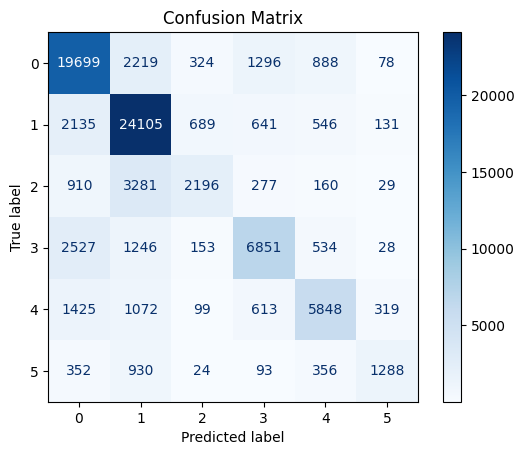

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=linear_svm.classes_)
disp.plot(cmap='Blues', values_format='d')  # 'Blues' –¥–ª—è –ª—É—á—à–µ–π —á–∏—Ç–∞–µ–º–æ—Å—Ç–∏
plt.title("Confusion Matrix")
plt.show()

–í—ã–≤–æ–¥—ã:


1.   –ú—ã –æ—Ç–ª–∏—á–Ω–æ –æ–ø—Ä–µ–¥–µ–ª—è–µ–º –≥—Ä—É—Å—Ç—å (0) –∏ —Ä–∞–¥–æ—Å—Ç—å (1)!
2. –î—Ä—É–≥–æ–π –≤–æ–ø—Ä–æ—Å - –ø–æ—á–µ–º—É –º—ã —á–∞—Å—Ç–æ –∏—Ö –ø—É—Ç–∞–µ–º..
3.   –õ—é–±–æ–≤—å (2) –º—ã —á–∞—â–µ –ø—Ä–∏–Ω–∏–º–∞–µ–º –∑–∞ —Ä–∞–¥–æ—Å—Ç—å(1), —á–µ–º –∑–∞ –ª—é–±–æ–≤—å:D
4. –ê –∑–ª–æ—Å—Ç—å (3) –∑–∞ —Ä–∞–¥–æ—Å—Ç—å (1) –∫–∞–∫? –ú–æ–∂–µ—Ç, –≤ –≤—ã—Å–∫–∞–∑—ã–≤–∞–Ω–∏—è—Ö –º–Ω–æ–≥–æ —Å–∞—Ä–∫–∞–∑–º–∞, –∞ –º–æ–∂–µ—Ç...



–ö–∞–∂–µ—Ç—Å—è, –∫–ª–∞—Å—Å—ã 0 –∏ 1 –¥–æ–º–∏–Ω–∏—Ä—É—é—Ç, –ø–æ–ø—Ä–æ–±—É–µ–º —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞—Ç—å –∫–ª–∞—Å—Å—ã —Å –ø–æ–º–æ—â—å—é class_weight='balanced'

              precision    recall  f1-score   support

           0       0.78      0.73      0.75     24504
           1       0.81      0.75      0.78     28247
           2       0.48      0.57      0.52      6853
           3       0.65      0.68      0.66     11339
           4       0.63      0.67      0.65      9376
           5       0.46      0.73      0.56      3043

    accuracy                           0.71     83362
   macro avg       0.64      0.69      0.65     83362
weighted avg       0.72      0.71      0.71     83362



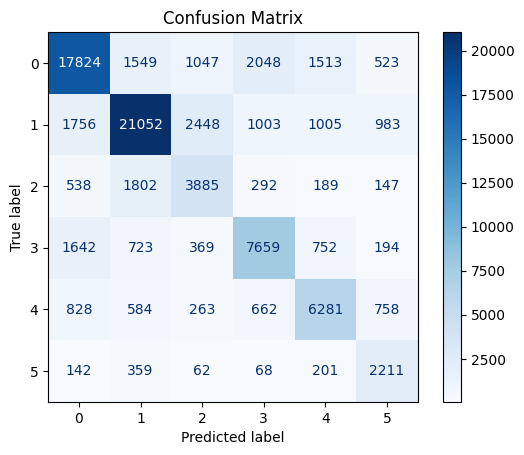

In [ ]:
linear_svm = LinearSVC(C=1.0, class_weight='balanced', random_state=42, max_iter=1000)
linear_svm.fit(X_train_scaled, y_train)
y_pred = linear_svm.predict(X_test_scaled)

# –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=linear_svm.classes_)
disp.plot(cmap='Blues', values_format='d')  # 'Blues' –¥–ª—è –ª—É—á—à–µ–π —á–∏—Ç–∞–µ–º–æ—Å—Ç–∏
plt.title("Confusion Matrix")
plt.show()

–°–∫–æ—Ä–∞ —Ç–∞–∫–∞—è –∂–µ, –∞ –≤–æ—Ç –º–∞—Ç—Ä–∏—Ü–∞ –Ω–∞–º –Ω—Ä–∞–≤–∏—Ç—Å—è –∫—É–¥–∞ –±–æ–ª—å—à–µ:


1.   –ü–æ –≤—Å–µ–π –¥–∏–∞–≥–æ–Ω–∞–ª–∏ –∫–ª–∞—Å—Å—ã –æ–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –Ω–∞–º–Ω–æ–≥–æ —Ç–æ—á–Ω–µ–µ
2.   –î–∞–∂–µ –ª—é–±–æ–≤—å(2) —Ç–µ–ø–µ—Ä—å —á–∞—â–µ –ª—é–±–æ–≤—å, —á–µ–º —Ä–∞–¥–æ—Å—Ç—å(1)



## Fine-tuning

0.71 - —ç—Ç–æ –Ω–µ–ø–ª–æ—Ö–æ, –Ω–æ –º—ã –¥–æ–ª–∂–Ω—ã –æ–±–æ–π—Ç–∏ –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–π –ø–∞–π–ø–ª–∞–π–Ω!

–ó–∞–π–º–µ–º—Å—è –¥–æ–æ–±—É—á–µ–Ω–∏–µ–º –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –Ω–∞ –Ω–∞—à–µ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

x_train = pd.read_csv('/content/drive/MyDrive/twitter/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/twitter/y_train.csv')
x_test = pd.read_csv('/content/drive/MyDrive/twitter/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/twitter/y_test.csv')
df = pd.read_csv('/content/drive/MyDrive/twitter/twitter_emotions_dataset.csv')

–í–æ –≤—Ä–µ–º—è —Ä–æ–∑—ã—Å–∫–∞ –º–æ–¥–µ–ª–µ–π, —Å–ø–æ—Å–æ–±–Ω—ã—Ö –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å –Ω–∞—à –Ω–µ–º–∞–ª–µ–Ω—å–∫–∏–π –¥–∞—Ç–∞—Å–µ—Ç –≤ —Ä–∞–∑—É–º–Ω—ã–µ —Å—Ä–æ–∫–∏, —Ç–æ –∏ –¥–µ–ª–æ –Ω–∞ –≥–ª–∞–∑–∞ –ø–æ–ø–∞–¥–∞–ª—Å—è [distilbert-base-uncased](https://huggingface.co/distilbert/distilbert-base-uncased).


 –≠—Ç–æ –∫–æ–º–ø–∞–∫—Ç–Ω–∞—è –≤–µ—Ä—Å–∏—è –º–æ–¥–µ–ª–∏ BERT, –∫–æ—Ç–æ—Ä–∞—è —Å–æ–∑–¥–∞–≤–∞–ª–∞—Å—å —Å —Ü–µ–ª—å—é —É–º–µ–Ω—å—à–∏—Ç—å —Ä–∞–∑–º–µ—Ä –∏ —É—Å–∫–æ—Ä–∏—Ç—å –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–æ–≥–æ BERT, –ø—Ä–∏ —ç—Ç–æ–º —Å–æ—Ö—Ä–∞–Ω—è—è –≤—ã—Å–æ–∫–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤.

 –û–Ω–∞ —Å–æ–¥–µ—Ä–∂–∏—Ç –≤ 2 —Ä–∞–∑–∞ –º–µ–Ω—å—à–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ —Ä–∞–±–æ—Ç–∞–µ—Ç –≤ —Å—Ä–µ–¥–Ω–µ–º –Ω–∞ 60% –±—ã—Å—Ç—Ä–µ–µ –æ–±—ã—á–Ω–æ–≥–æ BERT-base.

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã
model_name = "distilbert-base-uncased"
batch_size = 16
num_epochs = 3
num_classes = 6
learning_rate = 2e-5

# –¢–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä –∏ –º–æ–¥–µ–ª—å
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=num_classes)

# –î–∞—Ç–∞—Å–µ—Ç
class TwitterDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# –î–∞—Ç–∞–ª–æ–∞–¥–µ—Ä—ã
train_dataset = TwitterDataset(x_train["text"].tolist(), y_train["label"].tolist(), tokenizer, max_len=128)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# –û–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä –∏ Loss
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# –û–±—É—á–µ–Ω–∏–µ
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_loader)}")

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
torch.save(model.state_dict(), "/content/drive/MyDrive/twitter/distilbert_finetuned.pth")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20841/20841 [1:02:03<00:00,  5.60it/s]


Epoch 1, Loss: 0.12356430089252211


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20841/20841 [1:02:12<00:00,  5.58it/s]


Epoch 2, Loss: 0.08883621226789827


  0%|          | 18/20841 [00:03<1:03:01,  5.51it/s]

–ß—Ç–æ —Ç—É—Ç —Å–∫–∞–∂–µ—à—å! 2 —á–∞—Å–∞ –±–æ–ª—å—à–∏—Ö –Ω–∞–¥–µ–∂–¥ - –∏ GPU –æ—Ç–∫–∞–∑–∞–ª—Å—è —Å–ø–æ–Ω—Å–∏—Ä–æ–≤–∞—Ç—å –Ω–∞—à–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ.

–ö —Ç–∞–∫–æ–º—É —É –Ω–∞—Å —É–∂–µ –∏–º–º—É–Ω–∏—Ç–µ—Ç, —Ç–∞–∫ —á—Ç–æ –ø–µ—Ä–µ—Ö–æ–¥–∏–º –Ω–∞ —Ç—Ä–µ—Ç–∏–π –≥—É–≥–ª-–∞–∫–∫–∞—É–Ω—Ç –∏ –¥–∞–µ–º –¥–æ—Ä–æ–≥—É –ø—Ä–æ—è–≤–∏–≤—à–µ–π —Å–µ–±—è Taylor!

In [ ]:
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â—É—é, –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
from sklearn.model_selection import train_test_split

train_texts, temp_texts, train_labels, temp_labels = train_test_split(df["text"].tolist(), df["label"].tolist(), test_size=0.3, random_state=42)
val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, test_size=0.5, random_state=42)

In [ ]:
# –í–∞–ª–∏–¥–∞—Ü–∏—è
def eval_model(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct_predictions = 0
    with torch.no_grad():
        for batch in tqdm(data_loader, desc="Evaluating"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            preds = torch.argmax(outputs, dim=1)
            correct_predictions += torch.sum(preds == labels)
    return total_loss / len(data_loader), correct_predictions.double() / len(data_loader.dataset)

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Dataset –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
class TwitterDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long),
        }

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã
max_len = 128
batch_size = 16
num_epochs = 3
learning_rate = 2e-5 # —É–ø—Ä–∞–≤–ª—è–µ—Ç –≤–µ–ª–∏—á–∏–Ω–æ–π —à–∞–≥–æ–≤ –ø—Ä–∏ –æ–±–Ω–æ–≤–ª–µ–Ω–∏–∏ –≤–µ—Å–æ–≤ –º–æ–¥–µ–ª–∏
num_classes = 6

tokenizer = AutoTokenizer.from_pretrained("TaylorAI/bge-micro-v2")
base_model = AutoModel.from_pretrained("TaylorAI/bge-micro-v2")

# –°–æ–∑–¥–∞–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤ –∏ DataLoaders
train_dataset = TwitterDataset(train_texts, train_labels, tokenizer, max_len)
val_dataset = TwitterDataset(val_texts, val_labels, tokenizer, max_len)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
class Classifier(nn.Module):
    def __init__(self, base_model, num_classes):
        super(Classifier, self).__init__()
        self.base_model = base_model  # –ü—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å
        self.dropout = nn.Dropout(0.3) # —Å–ª—É—á–∞–π–Ω—ã–º –æ–±—Ä–∞–∑–æ–º –∏—Å–∫–ª—é—á–∞–µ—Ç 30% –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è
        self.classifier = nn.Linear(384, num_classes)  # Linear —Å–ª–æ–π –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π, –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ—Ç 384 –ø—Ä–∏–∑–Ω–∞–∫–∞ –≤ 6 –ª–æ–≥–∏—Ç–æ–≤, –¥–∞–ª–µ–µ - softmax

    def forward(self, input_ids, attention_mask):
        outputs = self.base_model(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]  # –ò—Å–ø–æ–ª—å–∑—É–µ–º [CLS] —Ç–æ–∫–µ–Ω
        cls_output = self.dropout(cls_output)
        return self.classifier(cls_output)

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–¥–µ–ª–∏
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Classifier(base_model, num_classes)
model = model.to(device)

# –û–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä –∏ —Ñ—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# –û–±—É—á–µ–Ω–∏–µ
def train_model(model, data_loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for batch in tqdm(data_loader, desc="Training"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(data_loader)


# –¶–∏–∫–ª –æ–±—É—á–µ–Ω–∏—è —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    train_loss = train_model(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc = eval_model(model, val_loader, criterion, device)
    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}")

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
torch.save(model.state_dict(), "/content/drive/MyDrive/twitter/taylor_finetuned.pth")
print("Model saved!")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.56k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/745 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/34.8M [00:00<?, ?B/s]

Epoch 1/3


Evaluating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3908/3908 [00:47<00:00, 82.17it/s]


Train Loss: 0.2041, Val Loss: 0.1042, Val Accuracy: 0.9377
Epoch 2/3


Evaluating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3908/3908 [00:47<00:00, 82.42it/s]


Train Loss: 0.1094, Val Loss: 0.0952, Val Accuracy: 0.9389
Epoch 3/3


Evaluating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3908/3908 [00:47<00:00, 82.41it/s]


Train Loss: 0.0979, Val Loss: 0.0911, Val Accuracy: 0.9393
Model saved!


–ï—Å—Ç—å —Å —á–µ–º —Å—Ä–∞–≤–Ω–∏—Ç—å: –∫–æ–≥–¥–∞ –∫–∞–∂–¥–∞—è —ç–ø–æ—Ö–∞ –∑–∞–Ω–∏–º–∞–µ—Ç –ø–æ 10 –º–∏–Ω—É—Ç, —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –ª–µ–≥–∫–æ –Ω–∞ –¥—É—à–µ.

–ß—Ç–æ –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å –æ–± –æ–±—É—á–µ–Ω–∏–∏? Train Loss –∏ Val Loss —Å–Ω–∏–∂–∞—é—Ç—Å—è –Ω–∞ –ø—Ä–æ—Ç—è–∂–µ–Ω–∏–∏ –≤—Å–µ—Ö —ç–ø–æ—Ö. –≠—Ç–æ —Ö–æ—Ä–æ—à–∏–π –ø—Ä–∏–∑–Ω–∞–∫, –∫–æ—Ç–æ—Ä—ã–π –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –º–æ–¥–µ–ª—å –ø—Ä–æ–¥–æ–ª–∂–∞–µ—Ç –æ–±—É—á–∞—Ç—å—Å—è –∏ —É–ª—É—á—à–∞—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π. –ö —Ç—Ä–µ—Ç—å–µ–π —ç–ø–æ—Ö–µ Val Loss —Å–Ω–∏–∂–∞–µ—Ç—Å—è –Ω–µ –æ—á–µ–Ω—å –∞–∫—Ç–∏–≤–Ω–æ, –∑–Ω–∞—á–∏—Ç, —Å–∫–æ—Ä–æ –º–æ–∂–µ—Ç –Ω–∞—á–∞—Ç—å—Å—è –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ - —Ç—Ä–µ—Ö —ç–ø–æ—Ö –Ω–∞–º –≤–ø–æ–ª–Ω–µ —Ö–≤–∞—Ç–∏—Ç.

–í–∞–ª–∏–¥–∏—Ä—É–µ–º!

In [ ]:
# –í–∞–ª–∏–¥–∞—Ü–∏—è
def eval_model(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct_predictions = 0

    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for batch in tqdm(data_loader, desc="Evaluating"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            preds = torch.argmax(outputs, dim=1)
            correct_predictions += torch.sum(preds == labels)

            all_predictions.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_predictions)
    print(f"Validation Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(all_labels, all_predictions))

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_predictions)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    return total_loss / len(data_loader), correct_predictions.double() / len(data_loader.dataset)

Evaluating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3908/3908 [00:54<00:00, 72.21it/s]


Validation Accuracy: 0.9377

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18161
           1       0.93      0.99      0.96     21332
           2       0.96      0.73      0.83      5150
           3       0.94      0.94      0.94      8545
           4       0.86      0.94      0.90      7034
           5       0.96      0.65      0.78      2300

    accuracy                           0.94     62522
   macro avg       0.94      0.87      0.90     62522
weighted avg       0.94      0.94      0.94     62522



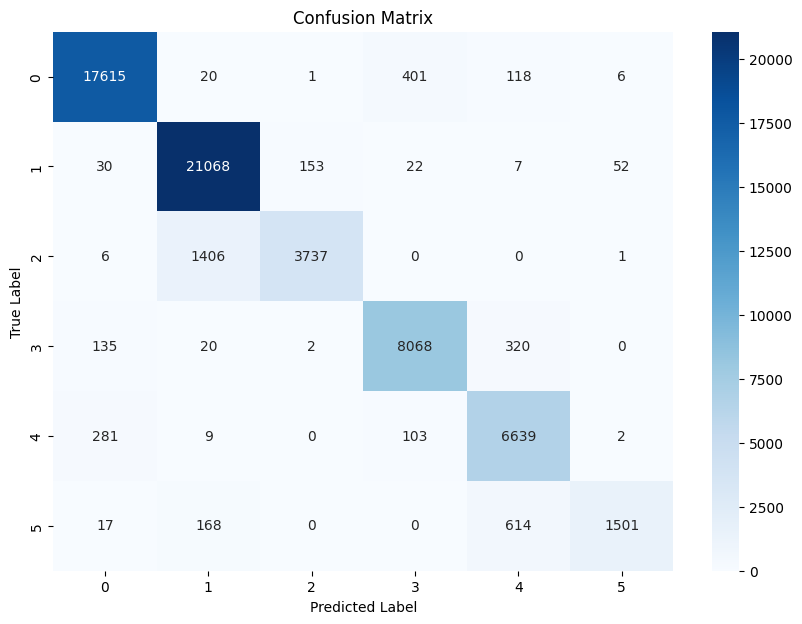

Test Loss: 0.0918, Test Accuracy: 0.9377


In [ ]:
# –û–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω–∞—è –æ—Ü–µ–Ω–∫–∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
test_dataset = TwitterDataset(test_texts, test_labels, tokenizer, max_len)
test_loader = DataLoader(test_dataset, batch_size=batch_size)
test_loss, test_acc = eval_model(model, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

**0.94, –¥—Ä—É–∑—å—è!**

–û—á–µ–Ω—å —Ä–∞–¥—É–µ—Ç –ø–æ—Ç–µ–º–Ω–µ–≤—à–∞—è –¥–∏–∞–≥–æ–Ω–∞–ª—å –º–∞—Ç—Ä–∏—Ü—ã - –∫–ª–∞—Å—Å—ã –æ–ø—Ä–µ–¥–µ–ª—è—é—Ç—Å—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ!

–î–∞, –ª—é–±–æ–≤—å(2) –∏ —Ä–∞–¥–æ—Å—Ç—å(1) –≤—Å–µ –µ—â–µ –≤ –±–ª–∏–∑–∫–∏—Ö –æ—Ç–Ω–æ—à–µ–Ω–∏—è—Ö, –Ω—É –∏ –∑–∞–º–µ—á–∞—Ç–µ–ª—å–Ω–æ:)

–ü—Ä–æ—Ç–µ—Å—Ç–∏—Ä—É–µ–º —Å–∞–º–∏!

In [ ]:
from transformers import AutoTokenizer
import torch

def predict_class(text, model, tokenizer, max_len=128, device='cpu'):
    # –ü–µ—Ä–µ–∫–ª—é—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –≤ —Ä–µ–∂–∏–º –æ—Ü–µ–Ω–∫–∏
    model.eval()

    # –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_len,
        truncation=True,
        padding='max_length',
        return_attention_mask=True,
        return_tensors='pt'
    )
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.softmax(dim=1)  # –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ softmax –¥–ª—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π
        predicted_class = torch.argmax(logits, dim=1).item()

    return predicted_class

In [ ]:
def predict(text):
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  predicted_class = predict_class(text, model, tokenizer, device=device)
  print(f"Predicted class: {predicted_class}")

In [ ]:
predict("i hate school.")

Predicted class: 3


In [ ]:
predict("the best day of my life!")

Predicted class: 1


In [ ]:
predict("hahaha you are a joke")

Predicted class: 3


In [ ]:
predict("i surely hate this guy")

Predicted class: 3


In [ ]:
predict("there is nothing worse than this in the world.")

Predicted class: 0


In [ ]:
predict("i just love when this happens!")

Predicted class: 1


In [ ]:
predict("i'm actually trembling from these news")

Predicted class: 4


In [ ]:
predict("i am scared for my children")

Predicted class: 4


In [ ]:
predict("surprising")

Predicted class: 5


# –í—ã–≤–æ–¥—ã

–≠—Ç–æ –±—ã–ª–æ –∑–¥–æ—Ä–æ–≤–æ!

–ó–∞–¥–∞—á–∞ –º—É–ª—å—Ç–∏–∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –±—ã–ª–∞ —Ä–µ—à–µ–Ω–∞ –¥–≤—É–º—è —Å–ø–æ—Å–æ–±–∞–º–∏:


1.   –ö–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–π –ø–∞–π–ø–ª–∞–π–Ω
2.   –ü—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—ã–µ –º–æ–¥–µ–ª–∏



–î–ª—è –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–≤–æ–≥–æ –ø–æ–¥—Ö–æ–¥–∞ –±—ã–ª–æ –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–æ 4 —Ä–∞–∑–Ω—ã–µ –º–æ–¥–µ–ª–∏ –∏–∑ HuggingFace. –í —Ö–æ–¥–µ –∏—Ö –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –º—ã —Å—Ç–æ–ª–∫–Ω—É–ª–∏—Å—å —Å —Ç—Ä–µ–º—è –æ–≥—Ä–∞–Ω–∏—á–∏–≤–∞—é—â–∏–º–∏ —Ñ–∞–∫—Ç–æ—Ä–∞–º–∏:

1. –õ–∏–º–∏—Ç –Ω–∞ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ GPU
2. –û–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω–æ—Å—Ç—å RAM
3. –ë–æ–ª—å—à–æ–π —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞ - 417000 —Å—Ç—Ä–æ–∫

–î–ª—è —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –∏–º–µ—é—â–∏—Ö—Å—è —Ä–µ—Å—É—Ä—Å–æ–≤ –ø—Ä–∏—Ö–æ–¥–∏–ª–æ—Å—å –∞–∫—Ç–∏–≤–Ω–æ –º–∞–Ω–∏–ø—É–ª–∏—Ä–æ–≤–∞—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö: —Ä–∞—Å–ø—Ä–µ–¥–µ–ª—è—Ç—å –Ω–∞–≥—Ä—É–∑–∫—É –º–µ–∂–¥—É —Å—Ä–µ–¥–∞–º–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è CPU –∏ GPU, —Ä–∞–∑–±–∏–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–µ –Ω–∞ –±–∞—Ç—á–∏, –∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä–æ–≤–∞—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Ä–∞–ª–ª–µ–ª—å–Ω—ã—Ö –ø—Ä–æ—Ü–µ—Å—Å–æ–≤ (num_workers), —Å–æ–±–∏—Ä–∞—Ç—å –º—É—Å–æ—Ä —Å –ø–æ–º–æ—â—å—é gc, –Ω–∞—Ö–æ–¥–∏—Ç—å –±–∞–ª–∞–Ω—Å –º–µ–∂–¥—É —Å–∫–æ—Ä–æ—Å—Ç—å—é –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π –∏ –∫–∞—á–µ—Å—Ç–≤–æ–º –∏—Ö –º–µ—Ç—Ä–∏–∫.

–ù–∞–∏–±–æ–ª–µ–µ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–º —Ä–µ—à–µ–Ω–∏–µ–º –≤ –∑–∞–¥–∞—á–∞—Ö –∏–∑–≤–ª–µ—á–µ–Ω–∏—è —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –∏ –¥–æ–æ–±—É—á–µ–Ω–∏—è –≤ —É—Å–ª–æ–≤–∏—è—Ö –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω–æ—Å—Ç–∏ —Ä–µ—Å—É—Ä—Å–æ–≤ —Å—Ç–∞–ª–∞ –º–æ–¥–µ–ª—å [TaylorAI/bge-micro-v2](https://huggingface.co/TaylorAI/bge-micro-v2).

–ù–∞–ø–æ–º–Ω–∏–º –µ–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:
1. –≠–º–±–µ–¥–¥–∏–Ω–≥–∏, –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ —á–µ—Ä–µ–∑ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é –∏ –º–µ—Ç–æ–¥ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤, –æ—Ç–¥–∞–ª–∏ —Ç–æ—á–Ω–æ—Å—Ç—å –≤ **0.71**.
2. –î–æ–æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –æ–±–µ—Å–ø–µ—á–∏–ª–æ —Å–∫–æ—Ä—É **0.94**.